In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import re

import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz')

In [6]:
dtfa = DTFA.DeepTFA(lepping_db.all(), mask='/home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

01/20/2020 18:13:25 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-nonmusic_run-5_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2020 18:13:27 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-3_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2020 18:13:28 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/func/sub-control01_task-music_run-2_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/sound_depression/ds000171-download/all_tasks/wholebrain.nii.gz (zscore=True, smooth=6)
01/20/2020 18:13:30 Loading Nifti image /home/eli/Documents/sound_depression/fmriprep/sub-control01/

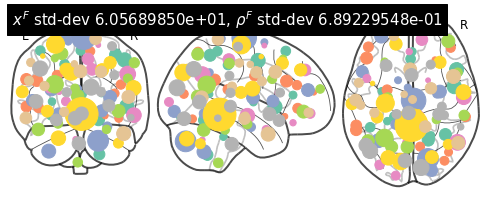

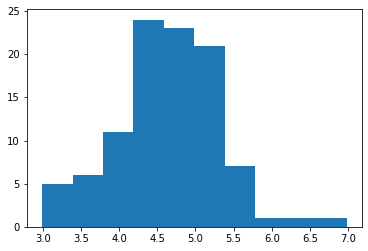

(<nilearn.plotting.displays.OrthoProjector at 0x7fb29e06cb50>,
 tensor([[-3.1077e+01, -8.4113e+01, -1.1350e+01],
         [ 4.8999e+01,  1.5753e+01, -7.0083e-01],
         [ 2.3662e+00,  3.4750e+01,  1.1629e+01],
         [-1.6382e+01, -3.3632e+01,  4.3305e+01],
         [ 2.0194e+01, -5.5297e+01, -5.1303e+01],
         [ 3.7232e+01, -5.2488e+01,  5.3496e+01],
         [-2.3856e+01, -3.8410e+01, -3.2166e+01],
         [ 6.4830e-01,  2.7119e+01,  5.7979e+01],
         [-2.9647e+01, -6.9655e+00,  4.1444e+00],
         [ 2.2490e+01, -5.2846e+01,  1.2405e+01],
         [ 1.9215e+01, -5.8282e+01, -1.4826e+01],
         [ 4.6644e+01, -2.0534e+00,  4.8015e+01],
         [-4.1892e+01, -4.4826e+01,  5.7789e+01],
         [ 1.0614e+01, -6.5227e+01,  5.7261e+01],
         [-2.4111e+01, -5.5883e+00,  3.1778e+01],
         [-4.3751e+01,  3.9682e+01, -2.2658e+00],
         [ 2.0143e+01,  5.6693e+01,  1.4469e+01],
         [ 3.6325e+01, -8.0126e+01,  1.2806e+01],
         [ 4.2785e+01,  3.8867e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1500, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    blocks_filter=lepping_db.inference_filter(training=True))

01/20/2020 18:20:12 [Epoch 1] (23955ms) Posterior free-energy 1.16604058e+09 = KL from prior 1.65444844e+05 - log-likelihood -1.16587533e+09
01/20/2020 18:20:12 Saving checkpoint...
01/20/2020 18:20:36 [Epoch 2] (23929ms) Posterior free-energy 1.12030822e+09 = KL from prior 2.76052598e+04 - log-likelihood -1.12028070e+09
01/20/2020 18:20:59 [Epoch 3] (23272ms) Posterior free-energy 1.08344922e+09 = KL from prior 3.34792422e+04 - log-likelihood -1.08341594e+09
01/20/2020 18:21:23 [Epoch 4] (23364ms) Posterior free-energy 1.05537171e+09 = KL from prior 4.06953594e+04 - log-likelihood -1.05533088e+09
01/20/2020 18:21:46 [Epoch 5] (23188ms) Posterior free-energy 1.03557293e+09 = KL from prior 4.75322578e+04 - log-likelihood -1.03552531e+09
01/20/2020 18:22:09 [Epoch 6] (23322ms) Posterior free-energy 1.01915629e+09 = KL from prior 5.50124141e+04 - log-likelihood -1.01910118e+09
01/20/2020 18:22:33 [Epoch 7] (23259ms) Posterior free-energy 1.00728435e+09 = KL from prior 6.26167070e+04 - log

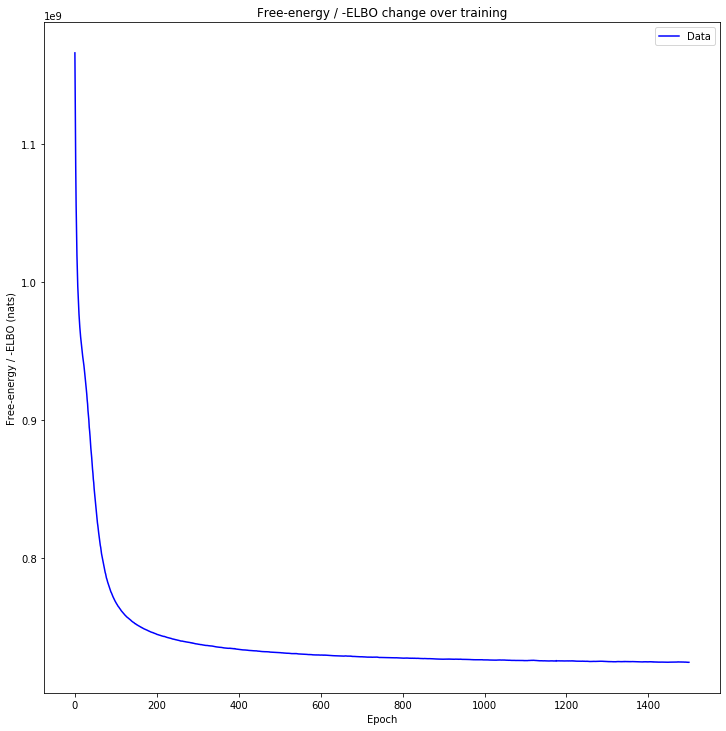

In [9]:
utils.plot_losses(losses)

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=18, patience=100,
                    train_globals=False, blocks_filter=lepping_db.inference_filter(training=False))

01/21/2020 04:02:31 [Epoch 1] (4501ms) Posterior free-energy 3.55211168e+08 = KL from prior 1.38344200e+06 - log-likelihood -3.53827744e+08
01/21/2020 04:02:31 Saving checkpoint...
01/21/2020 04:02:36 [Epoch 2] (4472ms) Posterior free-energy 3.54984640e+08 = KL from prior 1.38160900e+06 - log-likelihood -3.53603072e+08
01/21/2020 04:02:40 [Epoch 3] (4453ms) Posterior free-energy 3.37883008e+08 = KL from prior 1.36570900e+06 - log-likelihood -3.36517312e+08
01/21/2020 04:02:44 [Epoch 4] (4448ms) Posterior free-energy 3.34755104e+08 = KL from prior 1.34918900e+06 - log-likelihood -3.33405888e+08
01/21/2020 04:02:49 [Epoch 5] (4500ms) Posterior free-energy 3.31884032e+08 = KL from prior 1.31758488e+06 - log-likelihood -3.30566400e+08
01/21/2020 04:02:53 [Epoch 6] (4482ms) Posterior free-energy 3.29953216e+08 = KL from prior 1.30109450e+06 - log-likelihood -3.28652128e+08
01/21/2020 04:02:58 [Epoch 7] (4483ms) Posterior free-energy 3.19472384e+08 = KL from prior 1.26128488e+06 - log-likeli

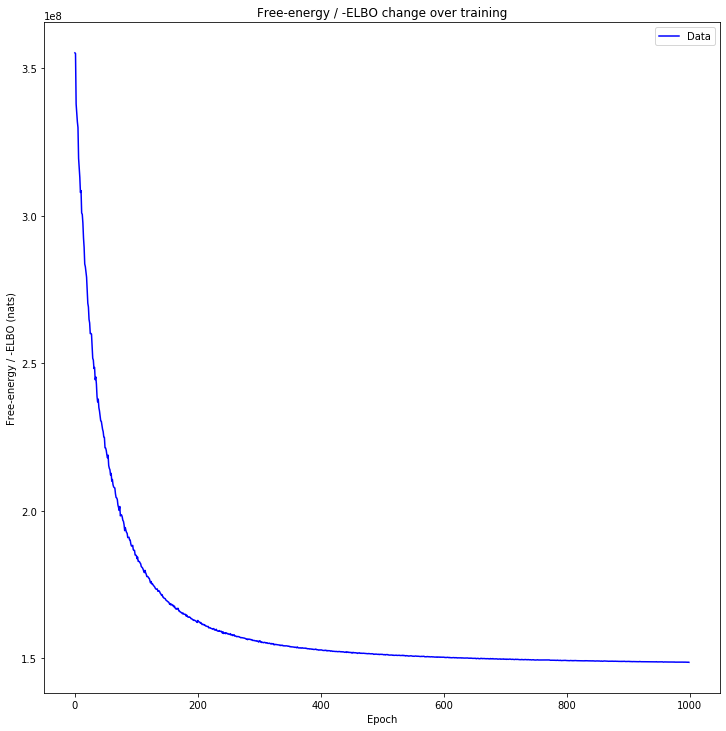

In [11]:
utils.plot_losses(losses)

In [12]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=True))

[[723952768.0, -720863424.0, 3089424.75],
 [723973952.0, -720843712.0, 3091259.75]]

In [13]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=15, num_particles=1, sample_size=100,
                 blocks_filter=lepping_db.inference_filter(training=False))

[[148711040.0, -148247136.0, 463884.09375],
 [148774000.0, -148186256.0, 465068.9375]]

In [14]:
def subject_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'Negative music'
    elif task == 'positive_music':
        task = 'Positive music'
    else:
        task = task.capitalize()
    return task

In [16]:
def lepping_2017_labeler(block):
    subject = subject_labeler(block.subject)
    task = task_labeler(block.task)
    return subject + ', ' + task + ' stimulus'

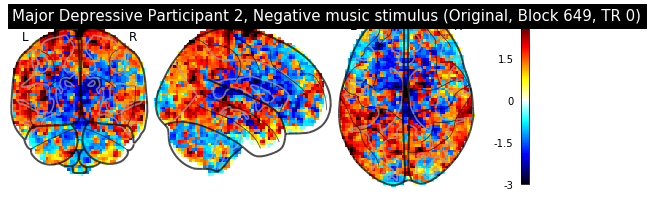

01/21/2020 05:43:17 Reconstruction Error (Frobenius Norm): 4.95612854e+02 out of 6.21813171e+02


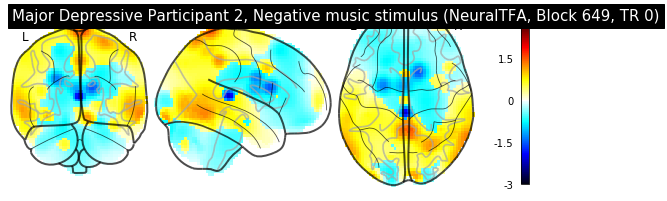

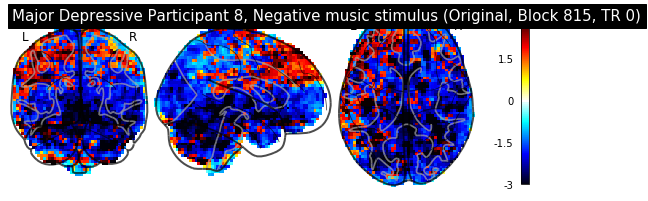

01/21/2020 05:43:20 Reconstruction Error (Frobenius Norm): 5.93010498e+02 out of 7.78718201e+02


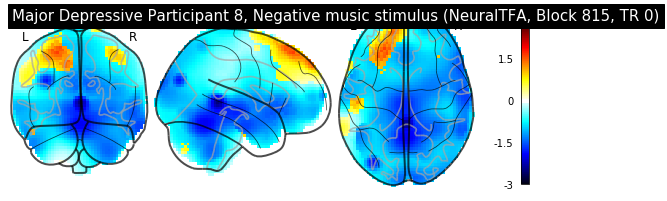

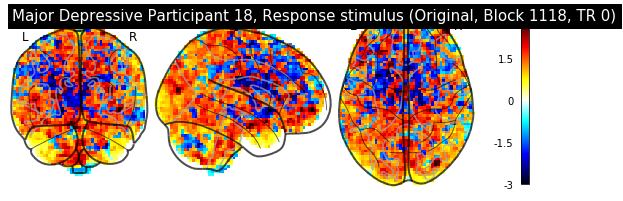

01/21/2020 05:43:22 Reconstruction Error (Frobenius Norm): 1.72031738e+02 out of 1.94600204e+02


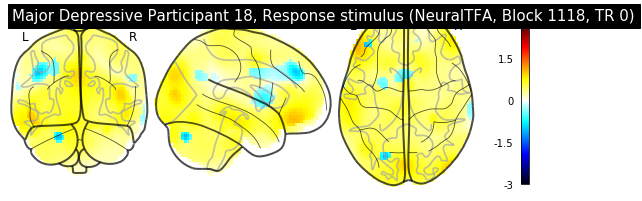

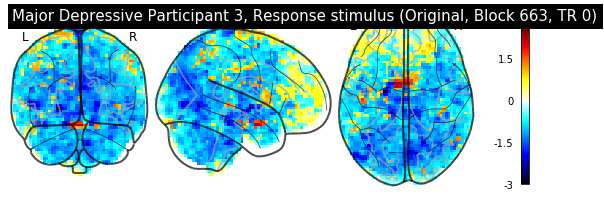

01/21/2020 05:43:24 Reconstruction Error (Frobenius Norm): 9.98802185e+01 out of 1.37601837e+02


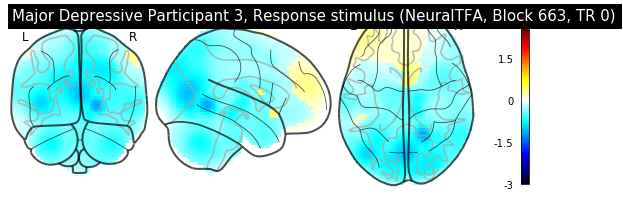

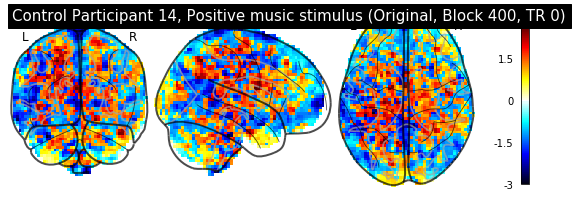

01/21/2020 05:43:27 Reconstruction Error (Frobenius Norm): 5.29634338e+02 out of 8.64177307e+02


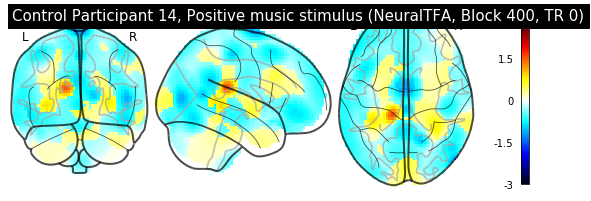

In [17]:
for b in np.random.choice(range(dtfa.num_blocks), 5):
    dtfa.plot_original_brain(b, labeler=lepping_2017_labeler)
    dtfa.plot_reconstruction(b, labeler=lepping_2017_labeler)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


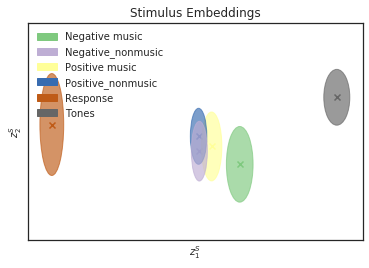

In [18]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


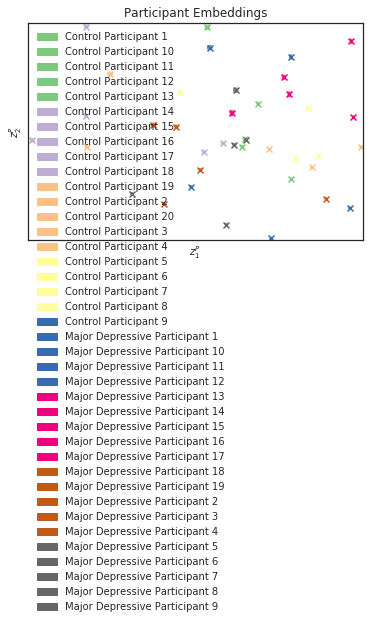

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

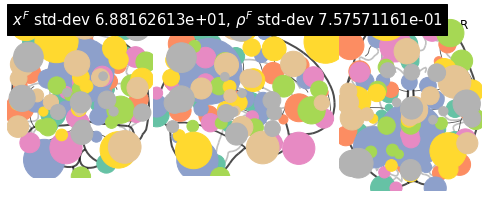

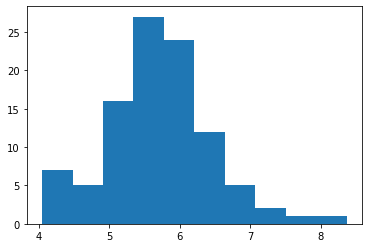

(<nilearn.plotting.displays.OrthoProjector at 0x7fb26424fd10>,
 tensor([[-2.8399e+01, -1.0864e+02, -8.7025e+00],
         [ 4.7145e+01,  5.6345e+00, -7.2006e+00],
         [-3.8173e+00,  4.2259e+01, -9.1921e-02],
         [-2.2139e+01, -2.4442e+01,  4.5234e+01],
         [ 2.7529e+01, -4.6738e+01, -6.1064e+01],
         [ 4.7487e+01, -6.3034e+01,  8.3249e+01],
         [-2.9876e+01, -3.3043e+01, -2.1167e+01],
         [ 9.0558e-03,  2.4334e+01,  8.4000e+01],
         [-2.2185e+01, -9.3523e+00,  4.7413e+00],
         [ 2.9747e+01, -4.6776e+01,  1.6719e+01],
         [ 1.8299e+01, -6.2293e+01,  1.8595e+00],
         [ 4.7371e+01, -2.5357e+01,  5.2474e+01],
         [-5.2925e+01, -4.8725e+01,  6.6721e+01],
         [-3.2766e-01, -8.2181e+01,  6.5533e+01],
         [-2.0221e+01, -5.3823e+00,  2.9482e+01],
         [-6.3127e+01,  4.0974e+01, -1.7379e+00],
         [ 2.7748e+01,  6.6392e+01,  1.4710e+01],
         [ 3.1446e+01, -9.2807e+01,  2.5496e+01],
         [ 3.9469e+01,  4.2472e+01,  

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error()

01/21/2020 05:44:26 Average reconstruction error (MSE): 6.68937407e-01
01/21/2020 05:44:26 Average data norm (Euclidean): 9.63051352e-01
01/21/2020 05:44:26 Percent average reconstruction error: 0.271836


(0.6689374068301966, 0.9630513515721812, 0.0027183618400760745)

In [22]:
def condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        return 'Major Depressive'
    elif condition == 'control':
        return 'Control'
    return condition

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:154: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


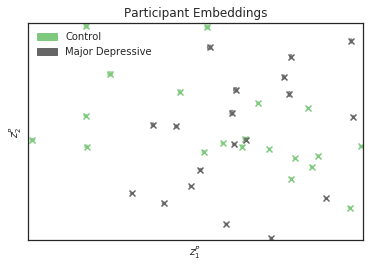

In [23]:
dtfa.scatter_subject_embedding(labeler=condition_labeler, figsize=None)

In [24]:
dtfa.average_reconstruction_error(weighted=False)

01/21/2020 05:45:22 Average reconstruction error (MSE): 4.56691909e+02 +/- 1.95751198e+02
01/21/2020 05:45:22 Average data norm (Euclidean): 6.49919916e+02 +/- 2.93704236e+02
01/21/2020 05:45:22 Percent average reconstruction error: 72.296067 +/- 1.35675168e+01


(array([585.16778564, 161.77027893, 520.8782959 , ..., 705.23443604,
        662.25756836, 691.10687256]),
 array([1174.47766113,  370.9303894 ,  983.5736084 , ...,  804.38378906,
         790.49407959,  846.68237305]),
 array([0.49823662, 0.43612032, 0.52957734, ..., 0.87673875, 0.83777676,
        0.81625282]))